### Deep Learning
Deep learning is an approach to machine learning characterised by deep stacks of computation. Neural networks have become the defining model of deep learning through their power and scalability.

One neuron is a linear unit: y = wx + b.

The input is *x* with weight *w* and bias *b*.

These linear units are used for multiple inputs to create bigger neurons: y = w_0*x_0 + w_1*x_1 + w_2*x_2 + b. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd

In [3]:
red_wine = pd.read_csv('red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
input_shape = [red_wine.shape[1]-1]

In [5]:
basic_model = keras.Sequential([layers.Dense(units=1, input_shape=input_shape)])

In [6]:
w, b = basic_model.weights
print(f'Weights: {w}')
print()
print(f'Bias: {b}')

Weights: <tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.548211  ],
       [ 0.2797438 ],
       [ 0.02876961],
       [ 0.41383332],
       [ 0.49543935],
       [-0.3913667 ],
       [ 0.08743364],
       [ 0.6348652 ],
       [ 0.00663793],
       [ 0.6814409 ],
       [ 0.1482057 ]], dtype=float32)>

Bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


#### Layers
Neural networks typically organise neurons into layers. When we collect together linear units with a common set of inputs we get a dense layer. We need a non-linear activation function in order to fit non linear relationships. An activation function is applied to each of a layers outputs. 

The most common activation function is the rectifier function (A typical x=y graph with the negative part 'rectified' to zero): max(0,x).

When applying to linear units we get the ReLU function: max(0, wx+b).

We can then have hidden layers before the output layer. 


In [7]:
layers_model = keras.Sequential([layers.Dense(units=4, activation='relu', input_shape=[2]), layers.Dense(units=3, activation='relu'), layers.Dense(units=1)])

In [8]:
import matplotlib.pyplot as plt 

In [9]:
def plot_activation_function(activation_function): 
    x = tf.linspace(-5, 5, 100)
    y = layers.Activation(activation_function)(x)

    plt.plot(x,y)
    plt.title(activation_function)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



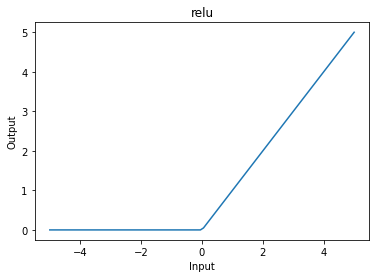

In [10]:
plot_activation_function('relu')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



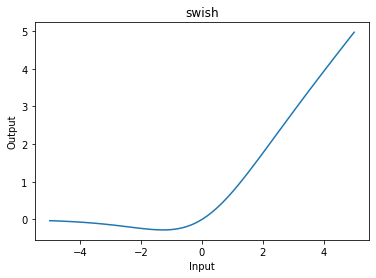

In [11]:
plot_activation_function('swish')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



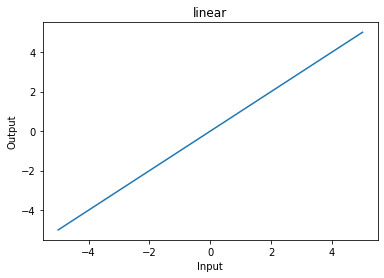

In [12]:
plot_activation_function('linear')

#### The Loss Function
The loss function measures the disparity between the targets true value and the value the model predicts. Thus, it tells the model it's objective.

A common loss function for regression problems is the *mean absolute error*, where the absolute error is: abs(y_true - y_predicted), and the total MAE is the mean of all of these. Other loss functions include mean squared error and Huber loss. 

#### The Optimiser - Stochastic Gradient Descent
The optimiser is an algorithm to minimise the loss. The loss function tells the network what to solve and the optimiser tells the model how to solve it. 

1. Sample some of the training data and run it through the model to make predictions
2. Measure the loss
3. Adjust the weights in a direction that makes the loss smaller


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(red_wine.drop('quality', axis=1), red_wine.quality, test_size=0.3, random_state=123)

In [15]:
loss_model = keras.Sequential([layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]), layers.Dense(512, activation='relu'), layers.Dense(512, activation='relu'), layers.Dense(1)])

In [16]:
loss_model.compile(optimizer='adam', loss='mae')

In [17]:
history = loss_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 38ms/step - loss: 4.0916 - val_loss: 1.3262
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 1.3130 - val_loss: 0.7301
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.8367 - val_loss: 0.6823
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.7344 - val_loss: 0.7912
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6977 - val_loss: 0.6333
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.7081 - val_loss: 0.6468
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6307 - val_loss: 0.5447
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6335 - val_loss: 0.6098
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6034 - val_loss: 0.5354
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5842 - val_loss: 0.5701


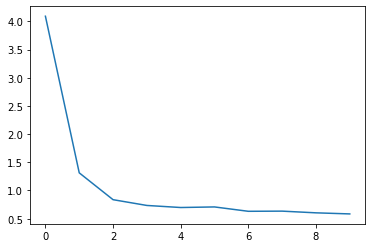

In [18]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss)
plt.show()

#### Learning Rate and Batch Size
The smaller batch size gave noiser weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noiser estimates. Smaller batches can have an 'averaging' effect which can be beneficial. 

Smaller learning rates make the updates smaller and training takes longer to converge. Large learning rates can speed up training but don't settle to a minimum as well. 



#### Overfitting and Underfitting
Information in the training data is of two kinds: *signal* and *noise*. The signal is the part that generalises and can help to make predictions. The noise is the part that is only true of the training data. Underfitting is when the model has not learnt enough of the signal, and overfitting is when the model has learnt too much of the noise. 

##### Capacity
A model's capacity refers to the size and complexity of patterns that it is able to learn. The capacity can be increased by making it wider (more units in layers), and deeper (more layers). wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones.

In [19]:
base_model = keras.Sequential([layers.Dense(16, activation='relu'), layers.Dense(1)])
wider_model = keras.Sequential([layers.Dense(16, activation='relu'), layers.Dense(1)])
deeper_model = keras.Sequential([layers.Dense(16, activation='relu'), layers.Dense(16, activation='relu'), layers.Dense(1)])

##### Early Stopping
Early stopping is used to stop training when the validation loss isn't decreasing anymore.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

In [22]:
early_stopping_model = keras.Sequential([layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]), layers.Dense(512, activation='relu'), layers.Dense(512, activation='relu'), layers.Dense(1)])
early_stopping_model.compile(optimizer='adam', loss='mae')

In [23]:
history = early_stopping_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=500, callbacks=[early_stopping], verbose=0)

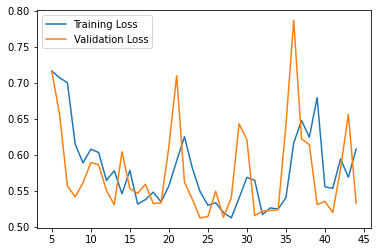

In [24]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss[5:], label='Training Loss')
plt.plot(history_df.val_loss[5:], label='Validation Loss')
plt.legend()
plt.show()

##### Dropout 
Overfitting is caused by the network learning a specific pattern in the training data, relying on a very specific combination of weights. A dropout layer is a random fraction of the layers inputs at every step of training so that the network is forced to only learn general patterns with robust weights. Dropout can also be thought of as creating an ensemble of networks. 

In [25]:
dropout_model = keras.Sequential([layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]), 
layers.Dropout(rate=0.3), layers.Dense(512, activation='relu'), # this dropout works to drop out 30% of the next layer
layers.Dense(1)])

##### Batch Normalisation
Normalisation is important for neural networks as features that produce activations of very different sizes can make for unstable training behaviour. A batch normalisation layer normalises the batch inside the network. 

Batch normalisation can be used at any point in the network, but having it as the first layer acts as an adaptive preprocessor. 

In [26]:
batchnorm_model = keras.Sequential([layers.BatchNormalization(), layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]),  layers.Dense(512, activation='relu'), layers.Dense(1)])

In [27]:
drop_batchnorm_model = keras.Sequential([layers.Dense(1024, activation='relu', input_shape=[11]), layers.Dropout(0.3), layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'), layers.Dropout(0.3), layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'), layers.Dropout(0.3), layers.BatchNormalization(),
    layers.Dense(1),])
drop_batchnorm_model.compile(optimizer='adam', loss='mae')

In [28]:
history = drop_batchnorm_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=100, verbose=0)

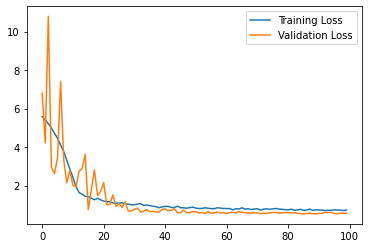

In [29]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss, label='Training Loss')
plt.plot(history_df.val_loss, label='Validation Loss')
plt.legend()
plt.show()

#### Binary Classification

##### Accuracy and Cross Entropy

Accuracy is the ratio of correct predictions to all predictions, and is a reasonbale metric to use for balanced class datasets. However, it cannot be used as a loss function. SGD needs a loss function that changes smoothly, so instead we use cross entropy for the loss function. 

*Cross entropy* is a measure for the distance from one probability distribution to another. We want our model to predict the correct class with probability of 1, the further away the predicted probability is from 1, the greater the cross entropy loss. 

In [30]:
ion = pd.read_csv('ion.csv', index_col=0)

In [31]:
ion_copy = ion.copy()
ion_copy.Class = ion_copy.Class.map({'good': 0, 'bad': 1})
ion_copy.dropna(axis=1, inplace=True)

In [40]:
df = ion.copy()
df['Class'] = df.Class.map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) 
df_valid.dropna(axis=1, inplace=True)

x_train = df_train.drop('Class', axis=1)
x_valid = df_valid.drop('Class', axis=1)
y_train = df_train.Class
y_valid = df_valid.Class

A sigmoid function is included in the final dense layer in order to convert the real-valued outputs into probabilities. To get the final class prediction a threshold probability is taken, typically at 0.5. 

In [43]:
binary_model = keras.Sequential([layers.Dense(4, activation='relu', input_shape=[33]), layers.Dense(4, activation='relu'), 
layers.Dense(1, activation='sigmoid')])

In [44]:
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [45]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

history = binary_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=512, epochs=1000, callbacks=[early_stopping], verbose=0)

Best validation loss: 0.4177235960960388
Best validation accuracy: 0.7523809671401978


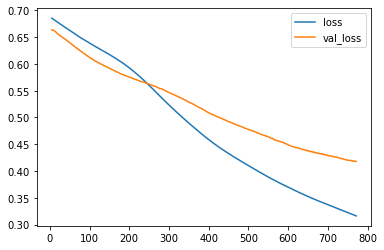

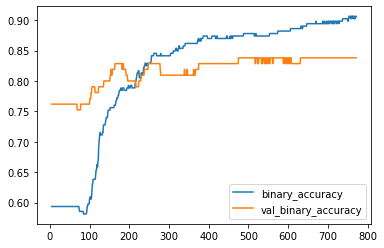

In [46]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

best_loss = history_df['val_loss'].min()
best_acc = history_df['val_binary_accuracy'].min()

print(f'Best validation loss: {best_loss}')
print(f'Best validation accuracy: {best_acc}')